In [17]:
import os 
import glob
import re 

import pandas as pd 
from matplotlib import pyplot as plt 
%matplotlib inline 
import matplotlib_venn

import numpy as np 
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
from itertools import product

output_dir = '../output/visualize_ontology/'; 
if not os.path.exists(output_dir): os.makedirs(output_dir)

In [102]:
def build_ont_digraph(ont, term_color='red', gene_color='blue'):
    
    """
    Building a hierarchical digraph
    
    """ 
    
    G = nx.DiGraph()
 
    node_set = set()
    nodes = []
    for i, sr in ont.iterrows():   
        if sr.EdgeType in ['Child-Parent']:
            
            if sr.Parent not in node_set:
                node_set.add(sr.Parent)
                nodes.append([sr.Parent, 'Term', term_color])
                
            if sr.Child not in node_set:
                node_set.add(sr.Child)
                nodes.append([sr.Child, 'Term', term_color])

        elif sr.EdgeType in ['Gene-Term']:
            if sr.Parent not in node_set:
                node_set.add(sr.Parent)
                nodes.append([sr.Parent, 'Term', term_color])
                
            if sr.Child not in node_set:
                node_set.add(sr.Child)
                nodes.append([sr.Child, 'Gene', gene_color])
                
    for name, ntype, ncolor in nodes:
        G.add_node(name, type=ntype, color=ncolor)
        
    for i, sr in ont.iterrows():   
        G.add_edge(sr.Parent, sr.Child)
        
    return(G)

/gpfs/data01/glasslab/home/joreyna/.conda/envs/tf_binding_nnet/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/gpfs/data01/glasslab/home/joreyna/.conda/envs/tf_binding_nnet/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


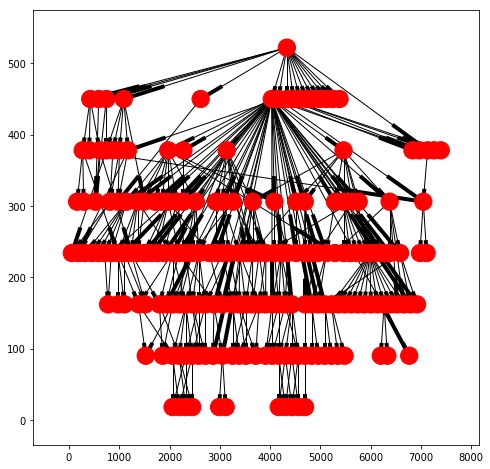

In [103]:
ont = '../data/synapse.txt'
ont = pd.read_table(ont)
G = build_ont_digraph(ont, 'red', 'blue') 

subG = G.copy()
for node, node_dict in G.nodes_iter(data=True):
    if node_dict['type'] == 'Gene':
        subG.remove_node(node)

fig, ax = plt.subplots(figsize=(8,8)) 
pos = graphviz_layout(subG, prog='dot', args='-Gsize=9,15\!')

nodes = subG.nodes(data=True)
colors = [n[1]['color'] for n in nodes]
nodes = [n[0] for n in nodes]

nx.draw_networkx(subG, pos, nodelist=nodes, node_color=colors, 
        with_labels=False, ax=ax, arrows=True)

fn = os.path.join(output_dir, 'stringdb_ont.png')
fig.savefig(fn, dpi=200)

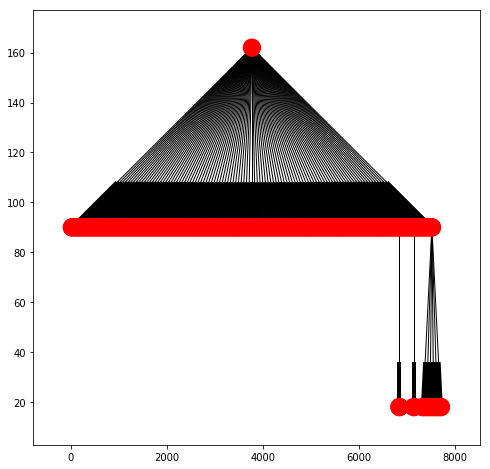

In [192]:
ont = '../analyses/Histogram_ont/finalontology3.txt'
ont = pd.read_table(ont)
G = build_ont_digraph(ont, 'red', 'blue') 

subG = G.copy()
for node, node_dict in G.nodes_iter(data=True):
    if node_dict['type'] == 'Gene':
        subG.remove_node(node)

fig, ax = plt.subplots(figsize=(8,8)) 
pos = graphviz_layout(subG, prog='dot', args='-Gsize=9,15\!')

nodes = subG.nodes(data=True)
colors = [n[1]['color'] for n in nodes]
nodes = [n[0] for n in nodes]

nx.draw_networkx(subG, pos, nodelist=nodes, node_color=colors, 
        with_labels=False, ax=ax, arrows=True)

fn = os.path.join(output_dir, 'stringdb_ont.png')
fig.savefig(fn, dpi=200)

In [142]:
parameters = list(product([0.01], [0.33, 0.35, 0.36, 0.39]))

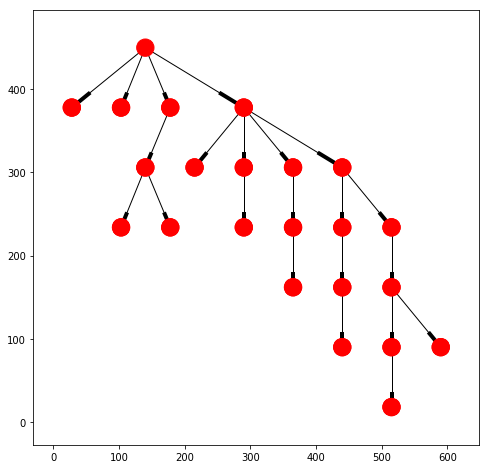

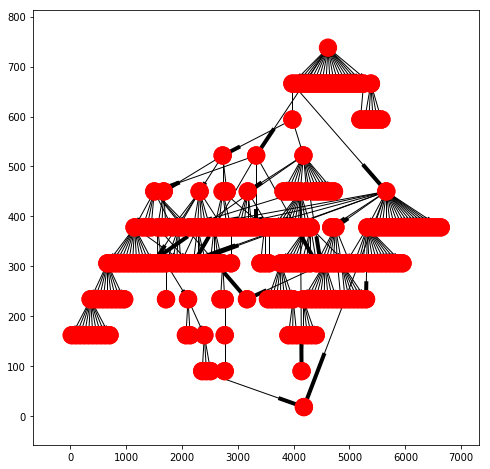

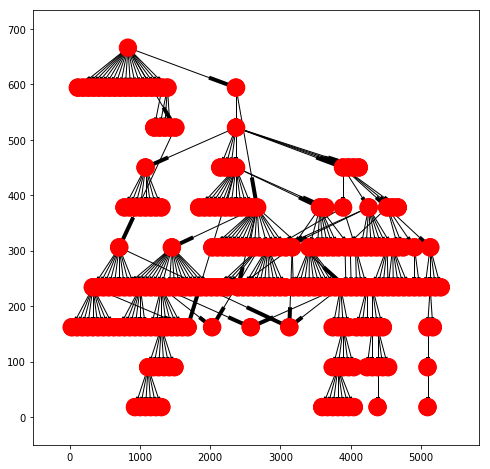

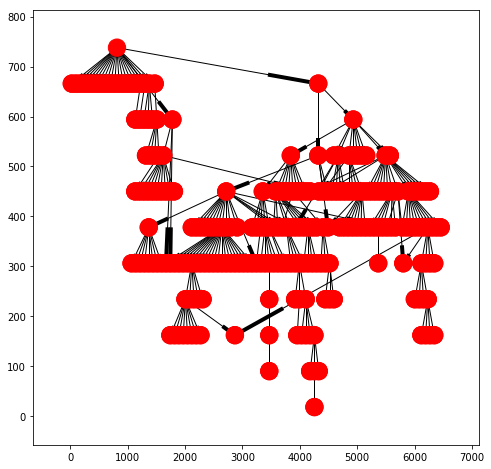

In [144]:
for alpha, beta in parameters: 
    
    alpha = '{:.2f}'.format(alpha)
    beta = '{:.2f}'.format(beta)
    
    ont = '../output/analyzing_clixo_ontologies/'
    ont += 'option2_string_synapse_interactions_combined_score.clixo_alpha{}_beta{}.txt'
    ont = ont.format(alpha, beta)
    
    
    ont = pd.read_table(ont)
    G = build_ont_digraph(ont, 'red', 'blue') 

    subG = G.copy()
    for node, node_dict in G.nodes_iter(data=True):
        if node_dict['type'] == 'Gene':
            subG.remove_node(node)

    fig, ax = plt.subplots(figsize=(8,8)) 
    pos = graphviz_layout(subG, prog='dot', args='-Gsize=9,15\!')

    nodes = subG.nodes(data=True)
    colors = [n[1]['color'] for n in nodes]
    nodes = [n[0] for n in nodes]

    nx.draw_networkx(subG, pos, nodelist=nodes, node_color=colors, 
            with_labels=False, ax=ax, arrows=True)

    fn = os.path.join(output_dir, 'stringdb_ont.png')
    fig.savefig(fn, dpi=200)

In [171]:
parameters = product(np.arange(0.01, 0.06, 0.01), np.arange(0.3, 0.4, 0.01))
for alpha, beta in parameters: 
    
    alpha = '{:.2f}'.format(alpha)
    beta = '{:.2f}'.format(beta)
    
    ont = '../output/analyzing_clixo_ontologies/'
    ont += 'option2_string_synapse_interactions_combined_score.clixo_alpha{}_beta{}.txt'
    ont = ont.format(alpha, beta)
    
    
    ont = pd.read_table(ont)
    G = build_ont_digraph(ont, 'red', 'blue') 

    subG = G.copy()
    for node, node_dict in G.nodes_iter(data=True):
        if node_dict['type'] == 'Gene':
            subG.remove_node(node)

    print('alpha', alpha,'beta', beta, len(subG))

alpha 0.01 beta 0.30 45
alpha 0.01 beta 0.31 51
alpha 0.01 beta 0.32 45
alpha 0.01 beta 0.33 45
alpha 0.01 beta 0.34 471
alpha 0.01 beta 0.35 465
alpha 0.01 beta 0.36 467
alpha 0.01 beta 0.37 475
alpha 0.01 beta 0.38 475
alpha 0.01 beta 0.39 477
alpha 0.01 beta 0.40 483
alpha 0.02 beta 0.30 25
alpha 0.02 beta 0.31 25
alpha 0.02 beta 0.32 25
alpha 0.02 beta 0.33 25
alpha 0.02 beta 0.34 287
alpha 0.02 beta 0.35 289
alpha 0.02 beta 0.36 291
alpha 0.02 beta 0.37 287
alpha 0.02 beta 0.38 283
alpha 0.02 beta 0.39 287
alpha 0.02 beta 0.40 285
alpha 0.03 beta 0.30 19
alpha 0.03 beta 0.31 19
alpha 0.03 beta 0.32 19
alpha 0.03 beta 0.33 19
alpha 0.03 beta 0.34 167
alpha 0.03 beta 0.35 169
alpha 0.03 beta 0.36 175
alpha 0.03 beta 0.37 173
alpha 0.03 beta 0.38 165
alpha 0.03 beta 0.39 163
alpha 0.03 beta 0.40 163
alpha 0.04 beta 0.30 11
alpha 0.04 beta 0.31 11
alpha 0.04 beta 0.32 11
alpha 0.04 beta 0.33 11
alpha 0.04 beta 0.34 103
alpha 0.04 beta 0.35 103
alpha 0.04 beta 0.36 105
alpha 0.04 beta 

/gpfs/data01/glasslab/home/joreyna/.conda/envs/tf_binding_nnet/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/gpfs/data01/glasslab/home/joreyna/.conda/envs/tf_binding_nnet/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


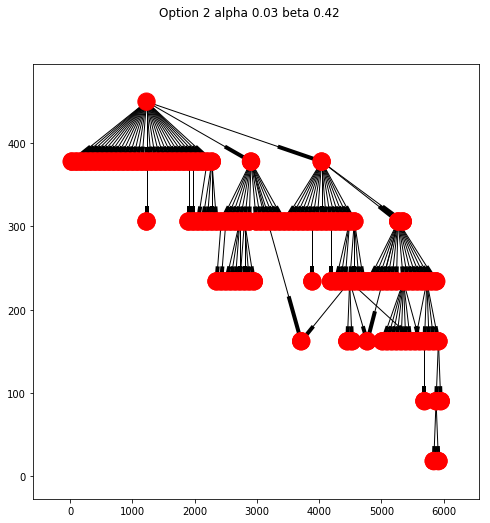

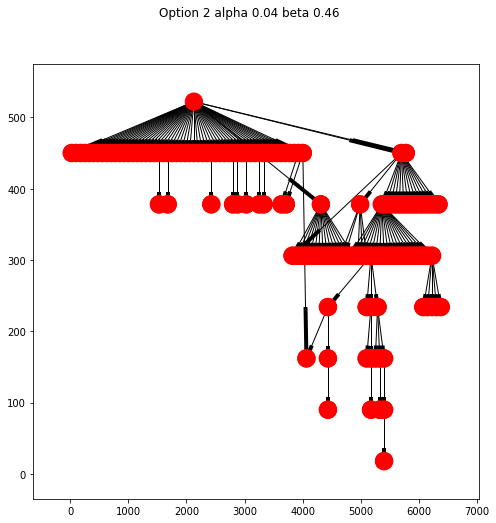

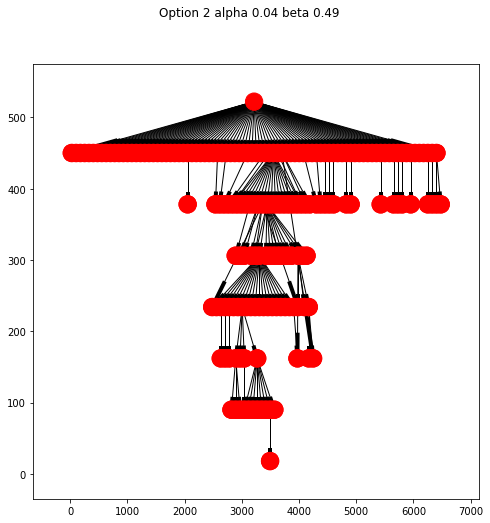

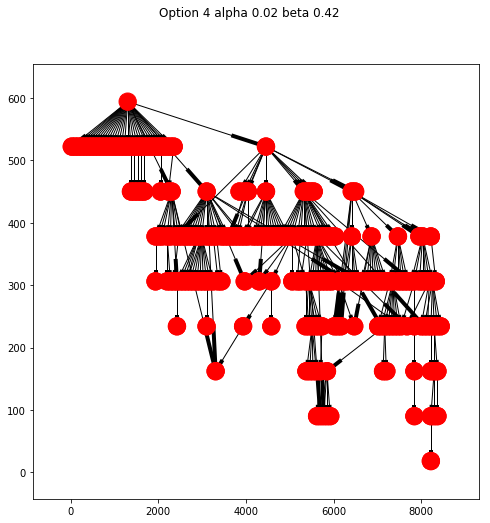

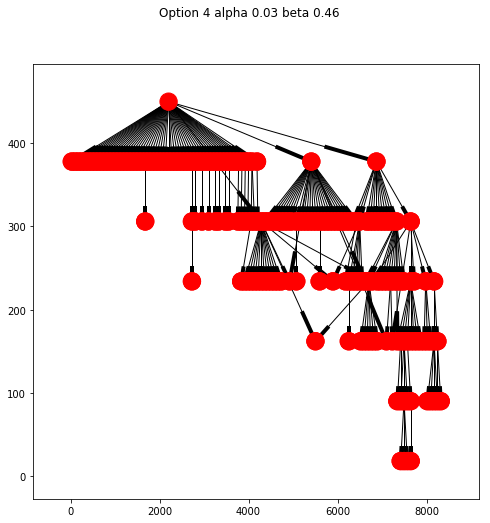

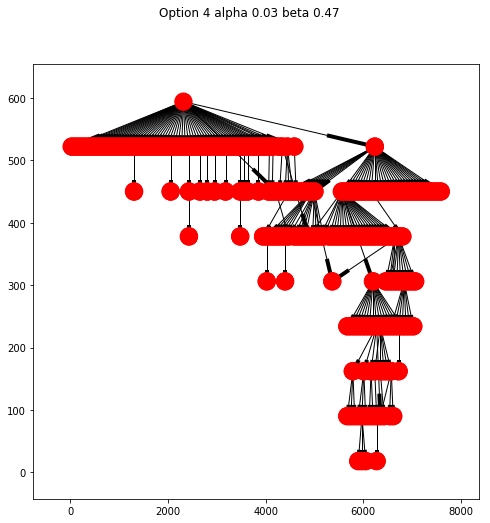

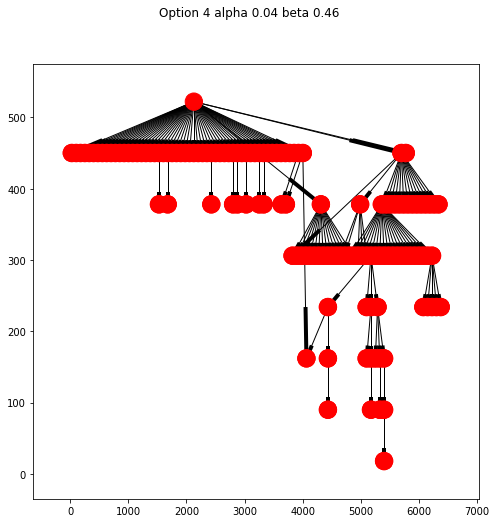

In [196]:
parameters = [(0.03, 0.42), (0.04, 0.46), (0.04, 0.49), (0.02, 0.42), (0.03, 0.46), (0.03, 0.47), (0.04, 0.46)]
options = [2] * 3 + [4] * 4
         
for (alpha, beta), option in zip(parameters, options):
    alpha = '{:.2f}'.format(alpha)
    beta = '{:.2f}'.format(beta)

    ont = '../output/analyzing_clixo_ontologies/'
    ont += 'option2_string_synapse_interactions_combined_score.clixo_alpha{}_beta{}.txt'
    ont = ont.format(alpha, beta)


    ont = pd.read_table(ont)
    G = build_ont_digraph(ont, 'red', 'blue') 

    subG = G.copy()
    for node, node_dict in G.nodes_iter(data=True):
        if node_dict['type'] == 'Gene':
            subG.remove_node(node)

    fig, ax = plt.subplots(figsize=(8,8)) 
    fig.suptitle('Option {} alpha {} beta {}'.format(option, alpha, beta))
    pos = graphviz_layout(subG, prog='dot', args='-Gsize=9,15\!')

    nodes = subG.nodes(data=True)
    colors = [n[1]['color'] for n in nodes]
    nodes = [n[0] for n in nodes]

    nx.draw_networkx(subG, pos, nodelist=nodes, node_color=colors, 
            with_labels=False, ax=ax, arrows=True)

    fn = os.path.join(output_dir, 'stringdb_ont.png')
    fig.savefig(fn, dpi=200)

## Offical ontology 

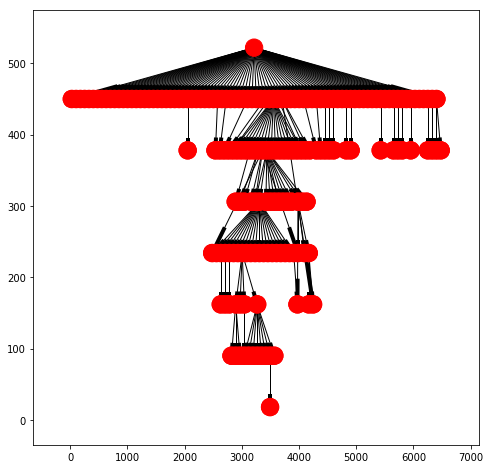

In [197]:
alpha = 0.04
beta = 0.49

alpha = '{:.2f}'.format(alpha)
beta = '{:.2f}'.format(beta)

ont = '../output/analyzing_clixo_ontologies/'
ont += 'option2_string_synapse_interactions_combined_score.clixo_alpha{}_beta{}.txt'
ont = ont.format(alpha, beta)


ont = pd.read_table(ont)
G = build_ont_digraph(ont, 'red', 'blue') 

subG = G.copy()
for node, node_dict in G.nodes_iter(data=True):
    if node_dict['type'] == 'Gene':
        subG.remove_node(node)

fig, ax = plt.subplots(figsize=(8,8)) 
pos = graphviz_layout(subG, prog='dot', args='-Gsize=9,15\!')

nodes = subG.nodes(data=True)
colors = [n[1]['color'] for n in nodes]
nodes = [n[0] for n in nodes]

nx.draw_networkx(subG, pos, nodelist=nodes, node_color=colors, 
        with_labels=False, ax=ax, arrows=True)

fn = os.path.join(output_dir, 'offical_ontology.png')
fig.savefig(fn, dpi=200)